### Install tensorflow-gpu 2.0 on Anaconda for Windows 10

In [1]:
# References

# (A) Installation: https://medium.com/@shaolinkhoa/install-tensorflow-gpu-2-0-alpha-on-anaconda-for-windows-10-ubuntu-ced099010b21
# (B) Add conda-forge channel :  https://medium.com/dunder-data/anaconda-is-bloated-set-up-a-lean-robust-data-science-environment-with-miniconda-and-conda-forge-b48e1ac11646

# (1)  Create fresh virtual environment.  We need a fresh environment since we will use both conda and
#      pip install.  Mixing installers, in my experience, can corrupt the environment.  conda-forge is 
#      recommended as the top priority Anaconda channel once TensorFlow 2.0 is available.  conda-forge 
#      is more consistent for package compatibility.

#(2)   OPTIONAL:  Add conda-forge.  Strictly prioritize it as the top priority channel.
#      conda config --env --add channels conda-forge
#      conda config --show channels
#      conda config --env --set channel_priority strict
#      conda config --show channel_priority

#(3)   Run terminal command:  conda install cudnn cudatoolkit=10.0

#(4)   Run terminal command:  pip install tensorflow-gpu

#### Beginner Quickstart

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [37]:
#Is GPU available?
tf.compat.v2.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

True

In [3]:
print(tf.__version__)

2.0.0


In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  #scale values to range 0-1

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3009 - accuracy: 0.9124
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1451 - accuracy: 0.9563
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1076 - accuracy: 0.9670
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0897 - accuracy: 0.9716
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0736 - accuracy: 0.9773
10000/1 - 1s - loss: 0.0383 - accuracy: 0.9762


[0.07611332831047475, 0.9762]

#### Keras Basics with 10 Categories of Clothing

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
# Class Labels
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

In [9]:
#Add class names list
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
# Get image shape.  There are 60,000 images and each image is 28X28 pixels.
train_images.shape

(60000, 28, 28)

In [11]:
# Class label count
len(train_labels)

60000

In [12]:
#Print first 25 training labels and print label unique values
print(train_labels[0:25])
print(np.unique(train_labels))

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4]
[0 1 2 3 4 5 6 7 8 9]


In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

In [15]:
#Are train and test labels balanced?  Yes.
unique, counts = np.unique(train_labels, return_counts=True)
print('train_labels frequency:\n')
print(np.asarray((unique, counts)).T)

train_labels frequency:

[[   0 6000]
 [   1 6000]
 [   2 6000]
 [   3 6000]
 [   4 6000]
 [   5 6000]
 [   6 6000]
 [   7 6000]
 [   8 6000]
 [   9 6000]]


In [16]:
unique, counts = np.unique(test_labels, return_counts=True)
print('test_labels frequency:\n')
print(np.asarray((unique, counts)).T)

test_labels frequency:

[[   0 1000]
 [   1 1000]
 [   2 1000]
 [   3 1000]
 [   4 1000]
 [   5 1000]
 [   6 1000]
 [   7 1000]
 [   8 1000]
 [   9 1000]]


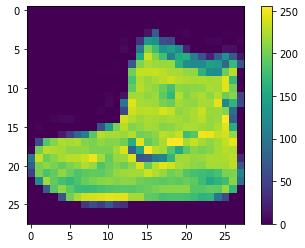

In [17]:
#Preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
#scale the values in an image to range 0-1
print('Before scaling:', train_images[0][10:12],'\n')
print('After scaling:', (train_images/256)[0][10:12])

train_images = train_images / 255.0
test_images = test_images /255.0

Before scaling: [[  0   0   0   0   0   0   0   0   0   0   0   0   0 193 228 218 213 198
  180 212 210 211 213 223 220 243 202   0]
 [  0   0   0   0   0   0   0   0   0   1   3   0  12 219 220 212 218 192
  169 227 208 218 224 212 226 197 209  52]] 

After scaling: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.75390625 0.890625   0.8515625  0.83203125 0.7734375
  0.703125   0.828125   0.8203125  0.82421875 0.83203125 0.87109375
  0.859375   0.94921875 0.7890625  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00390625 0.01171875 0.
  0.046875   0.85546875 0.859375   0.828125   0.8515625  0.75
  0.66015625 0.88671875 0.8125     0.8515625  0.875      0.828125
  0.8828125  0.76953125 0.81640625 0.203125  ]]


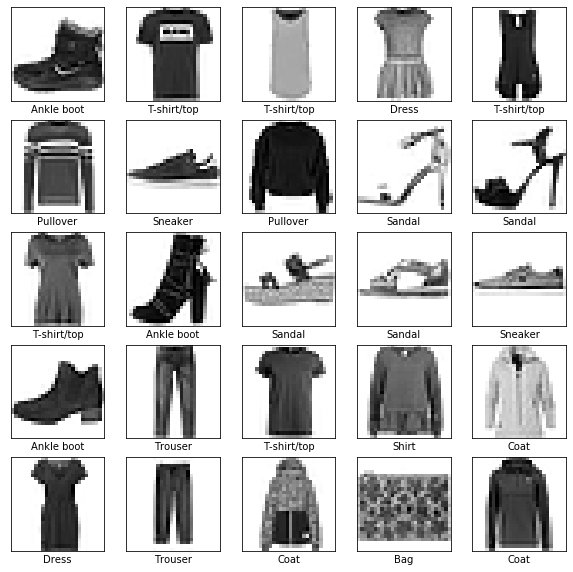

In [19]:
#Show first 25 images from train with class name
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [20]:
#Create 784 pixel first layer.  No learning parameters, just reshaping the 28X28 from 2-D to 1-D.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. 
#These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). 
#The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1.
#Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In [21]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
#Train the model.  Do 10 epochs or ten complete passes through the training set of 60,000.
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5016 - accuracy: 0.8246
Epoch 2/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3801 - accuracy: 0.8630
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3414 - accuracy: 0.8750
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3147 - accuracy: 0.8848
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2974 - accuracy: 0.8913
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2827 - accuracy: 0.8964
Epoch 7/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2725 - accuracy: 0.8991
Epoch 8/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2617 - accuracy: 0.9025
Epoch 9/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2513 - accuracy: 0.9065
Epoch 10/10
60

In [23]:
#Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2315 - accuracy: 0.8797

Test accuracy: 0.8797


In [24]:
#Predict test image labels.
predictions = model.predict(test_images)

In [25]:
#Prediction is array of 10 probabilities for the 10 labels.  Show label with highest confidence value.
predictions[0]
np.argmax(predictions[0])

9

In [26]:
#Convenience functions to plot image and color-code predicted labels based on correctness.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


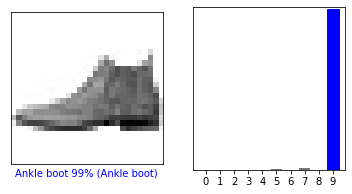

In [27]:
#View first image at index i=0.  Class 9 is ankle boot and blue means correct.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


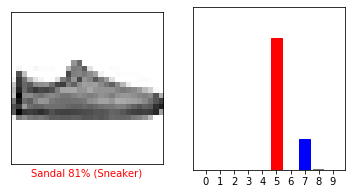

In [28]:
#  Class 5 prediction (Sandal) is wrong.  The true class was 7 (Sneaker).
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


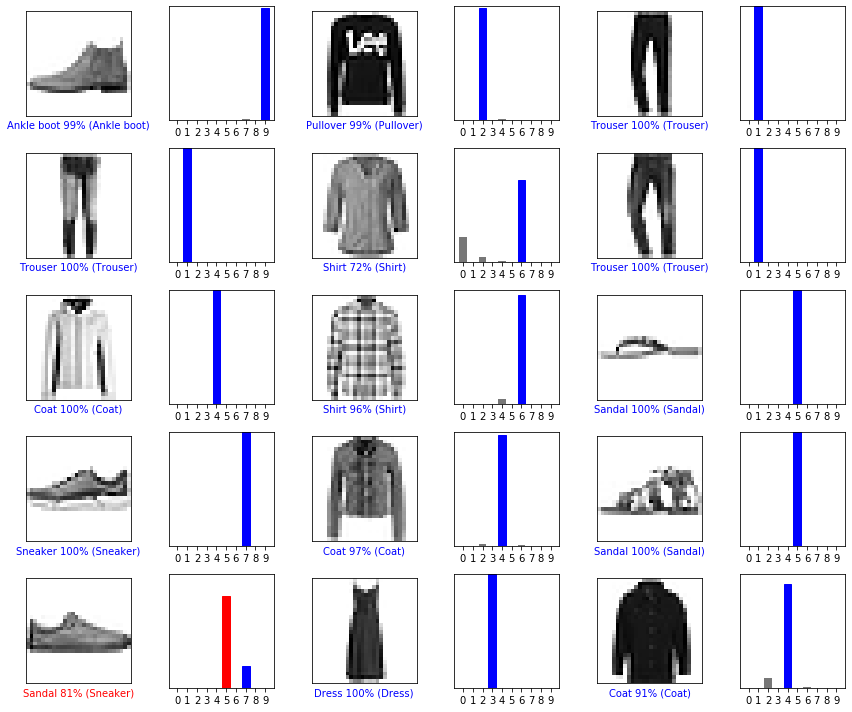

In [29]:
# Plot the first 15 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [30]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [31]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# So, although there is one image, you need to add it to a list
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [32]:
#Now predict the correct label for this image:
predictions_single = model.predict(img)
print(predictions_single)

[[1.8826990e-04 1.3368298e-10 9.8726815e-01 9.2719625e-12 1.2149402e-02
  4.7726177e-11 3.9418999e-04 6.6728482e-18 9.4228714e-10 2.7633498e-14]]


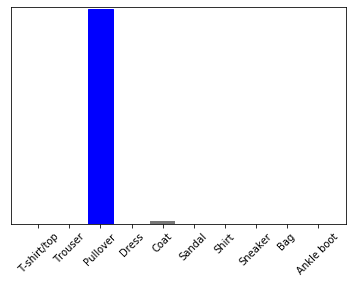

In [33]:
# Plot prediction probabilities, color-coded for correctness.
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
#Class 2 (Pullover) was predicted.
np.argmax(predictions_single[0])

2